**IST664 Lab for Week 4: Extracting Semantics**

If the end goal of a project is natural language understanding, at some point we must figure out how to associate words, phrases, sentences, and larger structures with the meaning that they convey. Figuring out the meaning of utterances is the goal of semantics. In fact the leading definition of the word semantics is, "the study of the meaning of words." In this lab, we are going to conisder three different approaches to extracting semantics from text.

One of the earliest and most comprehensive efforts to explore semantics on a large scale arose from the work of George Miller at Princeton in the mid-1980s. The database arising from Miller's work, known as WordNet, was an award-winning effort to create a network of interconnected meanings of words. You used WordNet briefly in last week's lab. The WordNet project is alive and well in the present day, in fact there is an international organization  known as the Global WordNet Association that continues research and development of WordNet. Check it out here:

http://globalwordnet.org

GWA has an annual conference and offers some databases and documentation to the world community for free. These databases, now covering more than 200 languages, represent a massive amount of collective human effort, which is both amazing and illustrative of the core challenge with such resources: The maintenance of manually developed language resources requires lots of manual labor.

Possibly, some of the value of what WordNet provides has been or will eventually be superceded by approaches based on deep learning. We see inklings of this with GloVe word embedding and more sophisticated embedding approaches such as BERT that are initially trained (in an unsupervised mode) on masses of unlabeled natural language text. Even so, WordNet works (and works fast!) without needing to provide any training data, so there are many applications where it is still an appropriate choice. In this first part of the week 4 lab, we explore some of the WordNet capabilities afforded by NLTK.

In [46]:
import nltk
nltk.download('wordnet') # Colab does not have it installed by default
nltk.download('omw-1.4') # Colab does not have it installed by default
from nltk.corpus import wordnet as wn

type(wn.synsets) # A key function call (method) that we will use

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


method

In [47]:
# Let's start by getting data on the word cat. A "synset" is a very basic
# data structure supported by NLTK that can be used to look up synonyms 
# and related information for any word that the WordNet folks have included
# in the giant database.
syn = wn.synsets('cat')
type(syn), len(syn)

(list, 10)

In [48]:
# The output above shows that the return data structure has 10 elements in a 
# list. What are these different list elements?
[type(s) for s in syn]

[nltk.corpus.reader.wordnet.Synset,
 nltk.corpus.reader.wordnet.Synset,
 nltk.corpus.reader.wordnet.Synset,
 nltk.corpus.reader.wordnet.Synset,
 nltk.corpus.reader.wordnet.Synset,
 nltk.corpus.reader.wordnet.Synset,
 nltk.corpus.reader.wordnet.Synset,
 nltk.corpus.reader.wordnet.Synset,
 nltk.corpus.reader.wordnet.Synset,
 nltk.corpus.reader.wordnet.Synset]

In [49]:
# Each element in the list is a synset object. We have more than one whenever
# there is more than one sense of the word.

cat0 = syn[0] # Let's look at some of the details for the first synset

print ("Synset name :  ", cat0.name())
  
# Defining the word
print ("\nSynset meaning : ", cat0.definition())
  
# list of phrases that use the word in context; not all words have these
print ("\nSynset example : ", cat0.examples())

Synset name :   cat.n.01

Synset meaning :  feline mammal usually having thick soft fur and no ability to roar: domestic cats; wildcats

Synset example :  []


Note that the synset name has interesting information in it: Of course the word itself comes first, but then the letter after the dot indicates the part of speech. The number after the second dot reveals the variant. So cat.n.01 would be read as "the first noun sense of cat." The fact that cat.n.01 appears as the first synset in the list indicates that linguists believed it to be the most commonly used sense of the word.

WordNet is organized as a tree structure, where we can find more specific and more general terms related to a particular word by tracing up or down the branches and twigs of the tree. A "hypernym" - which you can think of as "higher level name" - is a more general term that encompasses the word we are focusing on. In the other direction, a "hyponym" is an example of a word that is more specific than the word we are focusing on. As a mnemonic, remember that "hyper" means "excess" or "above" as in "hyperactive." On the other hand, "hypo" means below, as in "hypothermia." 

In [50]:
print ("Synset name :  ", cat0.name()) # Let's show the name again

# Here is the "root" word - the highest level hypernym  
print ("\nSynset root hypernym:  ", cat0.root_hypernyms())

# These are the more general terms  
print ("\nSynset hypernyms:  ", cat0.hypernyms())

# These are the more specific terms  
print ("\nSynset hyponyms:  ", cat0.hyponyms())



Synset name :   cat.n.01

Synset root hypernym:   [Synset('entity.n.01')]

Synset hypernyms:   [Synset('feline.n.01')]

Synset hyponyms:   [Synset('domestic_cat.n.01'), Synset('wildcat.n.03')]


The second and subsequent elements in the synset list (if any) are alternative word senses. If you're a music fan, you might be able to think of another use of the word "cat." In the first line of code below, we extract the second element of the synset list. Use it to show the name, definition, example, root hypernym, hypernyms, and hyponyms for this first synonym of cat.

In [51]:
# Exercises: Explore the second synset for "cat."
# Create a new block of code for each of the following exercises.

cat1 = syn[1] # Let's look at some of the details for the second element

# 4.1: Print the name of cat1: What part of speech is it?
print("Synset name :  ", cat1.name()) #guy.n.01

# 4.2: Print the definition of cat1
print("\nSynset meaning : ", cat1.definition()) #an informal term for a youth or man

# 4.3: Print the examples of use of cat1 in context
print("\nSynset example : ", cat1.examples()) #'a nice guy', "the guy's only doing it for some doll"

# 4.4: Print the root hypernym of cat1
print("\nSynset root hypernym:  ", cat1.root_hypernyms())
# 4.5: Print a list of hypernyms of cat1
print("\nSynset hypernyms:  ", cat1.hypernyms())
# 4.6: Print a list of hyponyms of cat1
print("\nSynset hyponyms:  ", cat1.hyponyms())

Synset name :   guy.n.01

Synset meaning :  an informal term for a youth or man

Synset example :  ['a nice guy', "the guy's only doing it for some doll"]

Synset root hypernym:   [Synset('entity.n.01')]

Synset hypernyms:   [Synset('man.n.01')]

Synset hyponyms:   [Synset('sod.n.04')]


In [52]:
# Given what you saw above, does it make sense now why the root hypernym
# of cat is "entity" rather than something more specific like "animal?"

# Cat is such a common word in English that it has been reused to refer
# to many different kinds of things. Let's go back to the complete list
# to show all of the definitions:

[s.definition() for s in syn]

['feline mammal usually having thick soft fur and no ability to roar: domestic cats; wildcats',
 'an informal term for a youth or man',
 'a spiteful woman gossip',
 'the leaves of the shrub Catha edulis which are chewed like tobacco or used to make tea; has the effect of a euphoric stimulant',
 'a whip with nine knotted cords',
 'a large tracked vehicle that is propelled by two endless metal belts; frequently used for moving earth in construction and farm work',
 'any of several large cats typically able to roar and living in the wild',
 'a method of examining body organs by scanning them with X rays and using a computer to construct a series of cross-sectional scans along a single axis',
 "beat with a cat-o'-nine-tails",
 'eject the contents of the stomach through the mouth']

In [53]:
# That's an amazing variety. Let's also glue the corresponding synset name
# to the definition so that we can see the parts of speech and numbering.
[ (s.name(), s.definition())  for s in syn]

[('cat.n.01',
  'feline mammal usually having thick soft fur and no ability to roar: domestic cats; wildcats'),
 ('guy.n.01', 'an informal term for a youth or man'),
 ('cat.n.03', 'a spiteful woman gossip'),
 ('kat.n.01',
  'the leaves of the shrub Catha edulis which are chewed like tobacco or used to make tea; has the effect of a euphoric stimulant'),
 ("cat-o'-nine-tails.n.01", 'a whip with nine knotted cords'),
 ('caterpillar.n.02',
  'a large tracked vehicle that is propelled by two endless metal belts; frequently used for moving earth in construction and farm work'),
 ('big_cat.n.01',
  'any of several large cats typically able to roar and living in the wild'),
 ('computerized_tomography.n.01',
  'a method of examining body organs by scanning them with X rays and using a computer to construct a series of cross-sectional scans along a single axis'),
 ('cat.v.01', "beat with a cat-o'-nine-tails"),
 ('vomit.v.01', 'eject the contents of the stomach through the mouth')]

In [54]:
# That last one is British slang, probably arising from the propensity of
# domestic cats to retch hairballs. Anyway. . . We can also get lemmas for
# each synonym entry in our list of 10:
[ (s.name(), s.lemma_names())  for s in syn]

[('cat.n.01', ['cat', 'true_cat']),
 ('guy.n.01', ['guy', 'cat', 'hombre', 'bozo']),
 ('cat.n.03', ['cat']),
 ('kat.n.01',
  ['kat', 'khat', 'qat', 'quat', 'cat', 'Arabian_tea', 'African_tea']),
 ("cat-o'-nine-tails.n.01", ["cat-o'-nine-tails", 'cat']),
 ('caterpillar.n.02', ['Caterpillar', 'cat']),
 ('big_cat.n.01', ['big_cat', 'cat']),
 ('computerized_tomography.n.01',
  ['computerized_tomography',
   'computed_tomography',
   'CT',
   'computerized_axial_tomography',
   'computed_axial_tomography',
   'CAT']),
 ('cat.v.01', ['cat']),
 ('vomit.v.01',
  ['vomit',
   'vomit_up',
   'purge',
   'cast',
   'sick',
   'cat',
   'be_sick',
   'disgorge',
   'regorge',
   'retch',
   'puke',
   'barf',
   'spew',
   'spue',
   'chuck',
   'upchuck',
   'honk',
   'regurgitate',
   'throw_up'])]

If you examined the output above carefully, you will see a lemma_name for guy.n.01, which is "bozo." In the late 1920s, this was a slang word which had the connotation of a big, muscular person of sub-normal intelligence. Gradually over the next century, this evolved into meaning a goofy or incompetent person. The use of this sense of the word peaked in 2012 and has been declining since. This anecdote illustrates the difficulty of maintaining an information resource like wordnet: Language usage changes over time, sometimes quite rapidly, and keeping up with those changes is time-consuming, expensive work.

In [55]:
# The elements of each of list shown above (as the second part of the tuple)
# are plain words - the lemma names - representing the synonym set. 
# This could come in handy later, so let's make sure we know how to 
# extract each synonym.

[s.lemma_names()[0] for s in syn]

['cat',
 'guy',
 'cat',
 'kat',
 "cat-o'-nine-tails",
 'Caterpillar',
 'big_cat',
 'computerized_tomography',
 'cat',
 'vomit']

In [106]:
# Now repeat the process by finding the synset for an adjectival word, like
# good, bad, great, horrid. etc. Show the list of lemma_names for that word. 
# As a related task, reduce that list of lemma names to its unique set
# in order to eliminate duplicates. As a bonus challenge, can you figure out 
# how to do all that with just one line of code?

# 4.7: Generate a unique set of lemmas for an adjective of your choice.

adjec = wn.synsets('good')
set([s.lemma_names()[0] for s in adjec])

{'adept',
 'beneficial',
 'commodity',
 'dear',
 'dependable',
 'effective',
 'estimable',
 'full',
 'good',
 'thoroughly',
 'well'}

In [57]:
# There are a couple more useful things we can do with a synset. First, we can
# ask WordNet for the part of speech for each entry:
from tabulate import tabulate # To make a neat table

takesyn = wn.synsets('take') # The word "take" has many senses - noun and verb

poslist = [(s.lemma_names()[0], s.pos(), s.definition()) for s in takesyn]

print(tabulate(poslist,  headers=["Word", "POS", "Definition"]))

Word         POS    Definition
-----------  -----  ----------------------------------------------------------------------------------------------
return       n      the income or profit arising from such transactions as the sale of land or other property
take         n      the act of photographing a scene or part of a scene without interruption
take         v      carry out
take         v      require (time or space)
lead         v      take somebody somewhere
take         v      get into one's hands, take physically
assume       v      take on a certain form, attribute, or aspect
take         v      interpret something in a certain way; convey a particular meaning or impression
bring        v      take something or somebody with oneself somewhere
take         v      take into one's possession
take         v      travel or go by means of a certain kind of transportation, or a certain route
choose       v      pick out, select, or choose from a number of alternatives
accept       v   

Having all of the most common words in a language organized based on their hypernyms and hyponyms supports some interesting operations. For example, the noun senses of "dog" and "cat" that refer to pets both have mammal as a "container" word. So we can traverse our way upward from "cat" to find the common ancestor word and then traverse back down to "dog." If we started with "cat" and we wanted to get to "doctor" it would probably take a lot more steps, because the common ancestor word would be much more general.    

This leads to an interesting possibility: We can calculate the similarity between any pair of words by measuring the length of the "path" along the twigs and branches that connects two words. Here's an example to illustrate:

In [58]:
# Pay close attention: the "synset" method looks up ONE synset if it
# exists. We have to specify exactly which synset we are talking about,
# so that's why we use something like bird.n.01 to refer to the first
# noun sense of bird. Earlier in this lab we used the "synsets" method
# which will look up all of the available synsets for a word. So "synset"
# and "synsets" do slightly different jobs.
birdsyn = wn.synset('bird.n.01') 
goatsyn = wn.synset('goat.n.01')
sheepsyn = wn.synset('sheep.n.01')

birdsyn.path_similarity(goatsyn) # Bird to goat
# These distances are normalized to be on a scale of 0 to 1 where 0
# is least similar and 1 is most similar.


0.1111111111111111

In [59]:
# Does this value make sense?
birdsyn.path_similarity(sheepsyn) # Bird to sheep

0.1111111111111111

In [60]:
# How about goat to sheep?
goatsyn.path_similarity(sheepsyn)

0.3333333333333333

#Discuss With Your Partner

Just above, you have three measures of word similarity. The scores have been normalized to a scale of 0 to 1 and they represent the "path length" between the two words in the synset hierarchy. Discuss these scores with your partner and make sure you agree on why two of them are identical and the other one is higher. The idea of "path length" means that there must be a traversal path between every pair of words in the database, yes? What would that look like for a noun and a verb?

In [61]:
# As with many things related to language, there is often an alternative way
# to do something. Leacock-Chodorow similarity also uses the path lengths, 
# but also considers how deep the least common ancestor is in the hierarchy. 
# Resnik similarity also considers the relative frequency of a word in a 
# corpus you provide. We show the earlier value of path similarity here just
# for the sake of comparison. 
nltk.download('wordnet_ic')
from nltk.corpus import wordnet_ic
brown_ic = wordnet_ic.ic('ic-brown.dat')

birdsyn.path_similarity(goatsyn), birdsyn.lch_similarity(goatsyn), birdsyn.res_similarity(goatsyn, brown_ic)

[nltk_data] Downloading package wordnet_ic to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet_ic.zip.


(0.1111111111111111, 1.4403615823901665, 5.2175784741185165)

In [108]:
# Obviously, these other similarity measures are calibrated on different
# scales from path similarity. Add code to produce the Leacock-Chodorow 
# and the Resnick similarity for sheepsyn to goatsyn

# 4.8: Compute L-C and Res similarity for sheepsyn to goatsyn
sheepsyn.path_similarity(goatsyn),sheepsyn.lch_similarity(goatsyn),sheepsyn.res_similarity(goatsyn,brown_ic)

(0.3333333333333333, 2.538973871058276, 8.005695458684853)

In [109]:
# OK, one last WordNet operation: Antonyms. If we want to find a word with
# the opposite meaning, WordNet can provide us with choices:
syn = wn.synsets('good') # Grab all of the synonyms for good
[(s.name(), s.definition()) for s in syn] # Display them

[('good.n.01', 'benefit'),
 ('good.n.02', 'moral excellence or admirableness'),
 ('good.n.03', 'that which is pleasing or valuable or useful'),
 ('commodity.n.01', 'articles of commerce'),
 ('good.a.01',
  'having desirable or positive qualities especially those suitable for a thing specified'),
 ('full.s.06', 'having the normally expected amount'),
 ('good.a.03', 'morally admirable'),
 ('estimable.s.02', 'deserving of esteem and respect'),
 ('beneficial.s.01', 'promoting or enhancing well-being'),
 ('good.s.06', 'agreeable or pleasing'),
 ('good.s.07', 'of moral excellence'),
 ('adept.s.01', 'having or showing knowledge and skill and aptitude'),
 ('good.s.09', 'thorough'),
 ('dear.s.02', 'with or in a close or intimate relationship'),
 ('dependable.s.04', 'financially sound'),
 ('good.s.12', 'most suitable or right for a particular purpose'),
 ('good.s.13', 'resulting favorably'),
 ('effective.s.04', 'exerting force or influence'),
 ('good.s.15', 'capable of pleasing'),
 ('good.s.16',

In [110]:
# We'll choose the first adjectival form for finding antonyms:
goodsyn = wn.synset('good.a.01')

# Now get the antonym from the lemma
[l.antonyms() for l in goodsyn.lemmas()]

[[Lemma('bad.a.01.bad')]]

In [111]:
# Now look up the antonym(s) for the adjectival sense of bad.

# 4.9: Look up the antonym for bad
badsyn = wn.synset('bad.a.01')
[l.antonyms() for l in badsyn.lemmas()]

[[Lemma('good.a.01.good')]]

**Part 2 - Word Sentiment**

Using WordNet, a truly massive effort to build a tree of semantics for words in various languages, we've looked up synonyms, antonyms, definitions, and examples for a variety of words. We've also gotten our first indication of quantitative relations between words, i.e., the similarity measures between pairs of words. The tree structure of WordNet was intentionally designed so that similar words were close to each other and semantically different words further away.

But what can we do with this kind of information? One of the first practical analytical methods for using semantics arises from efforts to measure sentiment in fragments of natural language - basically whether a phrase, sentence, paragraph or other structure is trying to say something positive or negative. Positive versus negative is perhaps the simplest form of sentiment, but naturally there are other forms as well: good vs. bad, happy vs. sad, useful vs. useless, etc. Maybe there is some way that we could use the structure of WordNet to get at these forms of sentiment. Let's start simple and then work our way to some more complex options.

In [66]:
# First, we need a dataset to work on. Anything with some comments and
# a sentiment indicator will do. This URL refers to a project on Github
# that Dennis Pan posted. If the URL is unavailable, find another CSV file
# with text comments and a sentiment score.
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/dennisypan/Quick-N-Dirty-Sentiment-Analysis/master/sentiment_on_business.csv")
print(list(data)) # Show column names

['Unnamed: 0', 'Business', 'Comments', 'Rating', 'Sentiment Label', 'Sentiment Score', 'URL']


In [67]:
# So we will be examining the Comments for hints about sentiment along with
# Sentiment Label and Sentiment Score, which were set up by the creator of the
# dataset to help with machine learning tasks.

# Show the number of rows and columns in this data set
data.shape

(70, 7)

In [68]:
# A very small dataset, but fine for what we are doing here.

# View a few comments. Note that the name of this data field ('Comments') is 
# peculiar to the Dennis Pan Yelp/Sushi data. If you change the dataset, you may
# need to change the name of the field where the comments are found.
data['Comments'][0:5]

0    Boyfriend and I ordered togo sushi and picked ...
1    I am pleased to recommend this restaurant in S...
2    great food been going to japan town since i wa...
3    Small sushi boat restaurant located in SJ Japa...
4    Sushi Maru is one of the many gems of SJ's Jap...
Name: Comments, dtype: object

In [115]:
#
# For the super bonus challenge at the end, you might need to use a regular
# expression to remove punctuation and digits from the text. You could put 
# that code here. This regex matches anything that is not an alpha character
# or whitespace: [^a-zA-Z\s]
# Don't worry about this for now, though. We want to first see the results
# with punctuation and other stuff left in the text.
#
import re
for s in data['Comments']:
  patt=re.sub('[^a-zA-Z\s]','',s)
  print(patt)

Boyfriend and I ordered togo sushi and picked up a couple bottles of sake next door to have dinner at home Our friends told us they werent fans of Sushi Maru but we decided to give it a shot anyway We hadHAMACHI ROLL I love yellowtail and thought this was great They added green onion which complimented it well Bf isnt too keen on yellowtail so I ate it all SAKE ROLL You cant go wrong with salmon The pieces are a decent size TEKKA ROLL Im not too big on tuna so bf had this He liked it RAINBOW ROLL We were both impressed The crab meat had great flavor Super delicious and we will order again We got all of that and only spent about  Dinner was perfect and we both liked it very much Next time well dine in and take advantage of their conveyor belt sushi bar
I am pleased to recommend this restaurant in San Joses Japantownright next door to Union Bank The restaurant is quite popular and fills up at lunchtime  The service is fast and friendly   There is a sushiboat bar for those who are so incl

In [117]:
# We know that the word "good" has many senses, but they are generally
# all positive as we saw in the WordNet work above. What if we just find
# all the comments where a good-related word appears in the text?
# Would that tell us anything about sentiment?

# First, let's see if we can just match one word
for g in data['Comments']:
  if 'good' in g.lower():
    print(g)

I am pleased to recommend this restaurant in San Jose's "Japantown"right next door to Union Bank. The restaurant is quite popular and fills up at lunchtime.  The service is fast and friendly.   There is a sushi-boat bar for those who are so inclined as it is definitely well-liked.  The booths are spacious and comfortable.  The  luncheon menu  is somewhat limited. Their tempura appetizer is really remarkable, both in taste and price, ample and affordable.  I was slightly disappointed in their salad dressing.  It's usually so good in Japanese restaurants. The restaurant is clean as is the ladies' room. Parking is not a problem. There is both street (metered) and lot parking.
Sushi Maru is one of the many gems of SJ's Japan town. They have a rotating sushi belt, but also a solid menu of entrees as well as individual nigiri and hand roll options. My friend and I both ordered the Chef's sushi special and some hot sake- the toro and salmon belly with skin were to DIE for. It was a great way 

In [118]:
# Before moving on, make sure to take a careful look at the list of comments
# above. Each should contain the word "good." What do you observe?

# Now look for good AND all of its synonyms. Notice the use of set().
lemmas = set([s.lemma_names()[0] for s in wn.synsets('good')])

# This is going to be a longer list, so let's just count the matches for now
# rather than printing them all.
matches = 0

for g in data['Comments']:
  for l in lemmas:
    if l in g.lower():
      matches += 1


print(matches)

44


In [72]:
# That's useful: We got a lot of mentions of all good-related words
# in the 70 comments stored in this dataset. This time we will count 
# how many matches we get per comment.

lemmas = set([s.lemma_names()[0] for s in wn.synsets('good')])

# Here we will assign matches into a list containing 70 elements
matches = [0] * data.shape[0] # Fill a list with 70 zeroes

# This loop uses an enumerator, which is a cool Python solution to a 
# common programming problem. The "i" that the enumerator produces is the
# index of the corresponding g. In this case the "g"s are the comments
# extracted from each successive row. 
for i, g in enumerate(data['Comments']): # Loop over all comments
  for l in lemmas:  # Loop over all lemmas of good
    if l in g.lower(): # If we get a match, increment the count
      matches[i] += 1

len(matches) # We should have 70 entries

70

(array([35.,  0.,  0., 27.,  0.,  0.,  7.,  0.,  0.,  1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

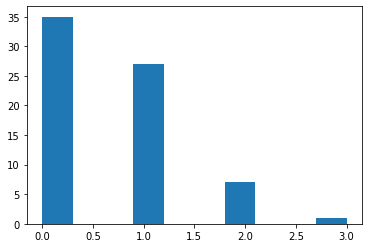

In [73]:
# What's the distribution of counts 
import matplotlib.pyplot as plt
plt.hist(matches)

#Discuss With Your Partner

Interpret the histogram above. What does the leftmost bar signify? It looks like there are 35 of something? What? 

Also, what's the maximum number of matches found in a comment?

In [74]:
# Let's use pandas to calculate the simple Pearson's correlation between
# the sentiment score in the data set and the count of good-related words.
x = pd.Series(data['Sentiment Score'])
y = pd.Series(matches)
x.corr(y)

0.12068240259212179

In [125]:
# Well, that's not a very strong result, but what if we used the word
# bad instead of the word good. Would that make any difference?
# (Use a separate code block for each task.)

# 4.11: Copy the loop from four blocks above and change from good to bad
lemmas = set([s.lemma_names()[0] for s in wn.synsets('bad')])

# Here we will assign matches into a list containing 70 elements
matches2 = [0] * data.shape[0] # Fill a list with 70 zeroes

# This loop uses an enumerator, which is a cool Python solution to a 
# common programming problem. The "i" that the enumerator produces is the
# index of the corresponding g. In this case the "g"s are the comments
# extracted from each successive row. 
for i, g in enumerate(data['Comments']): # Loop over all comments
  for l in lemmas:  # Loop over all lemmas of good
    if l in g.lower(): # If we get a match, increment the count
      matches2[i] += 1

len(matches2) 


70

(array([67.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

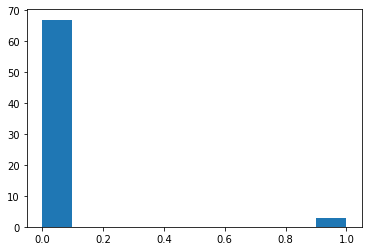

In [126]:
# 4.12: Create a histogram of matches
import matplotlib.pyplot as plt
plt.hist(matches)


In [ ]:
# 4.13: Write a comment interpreting the histogram

#'Bad' word also occurs 70 times. However, the words that match its meaning is only two. 
#Hence the historgram is distributed between 0 and 1
#We have only two synonyms for 'bad'
#First one occurs 65 times and second one occurs 5 times

In [128]:
# 4.14: Calculate the correlation between Sentiment Score and matches
x = pd.Series(data['Sentiment Score'])
y = pd.Series(matches2)
x.corr(y)



-0.1877341356444923

The approach we took above depends on the a priori assumption that the positive and negative meanings of words as determined by WordNet are the most appropriate way to score these comments. But what if we turned the puzzle around and let the comments "tell" us which words are the best? We can use a simple geometric technique called Linear Discriminant Analysis to accomplish this for us. Don't worry about the math for this: Just keep in mind that we are going to divide the dataset into two groups - a positive group and a negative group - and then find out to what degree each word functions differently in those two groups.

As we demonstrated in lab 3, we are going to use a vectorizer to represent what each word does in each document. As a reminder, TF-IDF stands for "term frequency, inverse document frequency" which is an alternative to the raw count of each word in a document that gives more weight to rare words.

In [76]:
# To perform the LDA calculation, we need a TF-IDF matrix, just like in Lab 3
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.casual import casual_tokenize

# We're keeping it simple for now, no special preprocessing. For example,
# we're leaving in stop words.
tfidfingest = TfidfVectorizer(tokenizer=casual_tokenize)
type(tfidfingest) # We've created an instance of our vectorizer

sklearn.feature_extraction.text.TfidfVectorizer

In [77]:
# Now we have the tool we need to create the TF-IDF matrix: tfidfingest can
# be used to "eat up" the text data from our dataset.
tfidfmatrix = tfidfingest.fit_transform(raw_documents=data['Comments']).toarray()

tfidfmatrix.shape, type(tfidfmatrix)

((70, 1254), numpy.ndarray)

In [78]:
# The 1254 columns is saying that we have 1254 unique terms in our vectorized
# dataset. Usually we would want to work a lot harder to get this number down.

# Remember that an array in numpy is a matrix-like object containing
# values all of the same type.

# What's in our array?
tfidfmatrix[:10,:5] # Just the first ten rows and five columns

array([[0.11255423, 0.        , 0.053985  , 0.        , 0.        ],
       [0.        , 0.15665963, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.22535615, 0.        , 0.0540444 , 0.        , 0.07541902],
       [0.0478254 , 0.        , 0.20644883, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.15721287, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

In [79]:
# Typical sparse array: Mostly zeroes. The non-zero values are fractional,
# showing that this is TF-IDF and not an array of simple counts.

# Now let's subdivide our original dataset based on whether each row was classed
# as a positive or negative comment. 

# Here we are creating what Python programmers sometimes call a "mask."
# The first mask will let us select the positive cases. The second mask will
# let us select the negative cases.

classlist = [(c=="Positive" or c=="Neutral") for c in data['Sentiment Label']] # Positive mask
notclasslist = [not c for c in classlist] # Negative mask

print(classlist[:8]) # Compare the first 8 results from the two masks
print(notclasslist[:8]) # Entries in these two lists should be boolean inverses

[True, True, True, False, True, True, True, False]
[False, False, False, True, False, False, False, True]


In [80]:
# We can use the masks to select the cases we want and the mean method
# to summarize our tfidf for each subset of the data

# Centroid means "a point in space that is in the middle of a bunch of other points"
poscentroid = tfidfmatrix[classlist].mean(axis=0)
negcentroid = tfidfmatrix[notclasslist].mean(axis=0)

separator = poscentroid - negcentroid # The difference in means for each word

separator

array([ 0.05894595, -0.11399296,  0.01746025, ...,  0.00252529,
        0.00154828,  0.01642816])

We just did quite a bit of math in a couple easy steps. When we computed each of the two centroids by taking the mean down the column, we summarized the "activity" of each word across all of the comments in each of the two subsets of the data. So for example, if "good" is important in positive reviews, the mean of its TF-IDF values across all the positive reviews should be high.

The final step in the previous code block is really interesting. By subtracting the two centroids, we get a representation of whether a word does something *different* in the two datasets. We call it "separator" because it represents a kind of dividing structure between the positive and negative data subsets.

In [81]:
# Now let's take our separator and put it together in a little
# dataset with the list of tokens, so we can see what's going on.
wordsent = pd.DataFrame({
    "Token":list(tfidfingest.get_feature_names_out()),
    "Sentiment":list(separator)
})

# Here we sort the cases from lowest to highest, based on the 
# value that we took from separator.
wordsent.sort_values(by=['Sentiment'], inplace=True)

wordsent.shape, list(wordsent) # Summarize our data frame

((1254, 2), ['Token', 'Sentiment'])

In [82]:
# After sorting, the "most negative" words are at the beginning of
# the data frame and the "most positive" words are at the end. Let's
# Take a look:

wordsent.head(15) # Give us 15 words that are most negative

,Token,Sentiment
1,"""",-0.113993
1076,the,-0.050822
1214,which,-0.048907
200,but,-0.047988
948,she,-0.044887
436,fish,-0.044311
78,agedashi,-0.043009
1104,tofu,-0.043009
87,alright,-0.043009
425,few,-0.042864


In [83]:
wordsent.tail(15) # Give us 15 words that are most positive

,Token,Sentiment
161,best,0.021562
1074,that,0.021747
312,delicious,0.021767
806,place,0.022676
252,come,0.022697
209,can,0.024593
1101,to,0.024680
761,order,0.025505
1033,sushi,0.027182
491,great,0.027710


Well, not everything in those lists makes sense, but remember that this is a really small dataset and we did not make the effort to filter out stop words or punctuation. Still, there's some interesting stuff in there, and we've shown how with a few simple steps, we can create a kind of "empirical" sentiment value for each word.

The next step also uses a cool matrix math trick. By creating *dot products* of the separator vector with the TF-IDF vector for each of our 70 comments, we can summarize the similarity/distance of a given comment from the dividing structure. Maybe the resulting document scores will be useful for something.

In [84]:
docusent = tfidfmatrix.dot(separator)
docusent

array([ 0.03190957,  0.00489625,  0.02053524, -0.1131945 ,  0.0068361 ,
        0.03714363,  0.05276984, -0.1372704 ,  0.01527414,  0.04051255,
       -0.13587406,  0.03995574,  0.00276345, -0.00473419,  0.03760517,
        0.02651981,  0.06201844,  0.00034177, -0.01263898,  0.03052205,
        0.02293302,  0.0197362 , -0.13294862,  0.02436511,  0.03068126,
        0.01019862,  0.00424415,  0.01116213,  0.04171756,  0.03642798,
        0.03830759,  0.0108454 ,  0.04254235,  0.00893868,  0.03582491,
        0.03351333,  0.03417034,  0.03088434, -0.00089552,  0.04566911,
        0.04567206,  0.05179615,  0.03851501,  0.04892801,  0.03642214,
        0.02451584,  0.03657144,  0.03245421, -0.12116866,  0.01874153,
        0.02458296, -0.00526663,  0.04728941,  0.0562507 ,  0.03587462,
        0.04009349, -0.12562397,  0.0534958 ,  0.02060276,  0.02848552,
        0.03458464,  0.04533432,  0.04616221,  0.01689287,  0.02849751,
        0.0065034 ,  0.02493422, -0.01567791,  0.05086638,  0.02

In [85]:
x = pd.Series(data['Sentiment Score']) # Here's the sentiment score from the data
y = pd.Series(docusent) # Here's our calculated separation of each document from the divider
x.corr(y).round(3)

0.618

# Checkpoint! Write your name and this correlation value on the whiteboard

That's a way better result than what we got by counting WordNet synonyms. We shouldn't get too excited though, because we did not hold out a test set to verify our results, so it is likely that these results are peculiar to this sample of texts. 

The important thing to note is this: If we have a training criterion (in this case we used Sentiment Label), we can easily process our text in a way that shows us which words are associated with positive sentiment and which words are associated with negative sentiment. Of course sentiment is only one small aspect of semantics as a whole: A word like "fresh" can be strongly positive while still containing many other shades of meaning.

We used a simple mathematical method to tease out this thin slice of semantics in a somewhat primitive way. As we go further into the course, we are going to learn additional methods for having the data tell us about the meanings of words. Because of the rapid evolution of deep learning techniques and their proven success in so many NLP tasks, many researchers believe that the age of maintaining large, manually-created dictionaries is over.

To close this section and get a little practice, let's go back to the vectorization process, take out stop words, and then reproduce the analysis demonstrated above:

In [86]:
# Super bonus task! Make sure that you will have time to get the next section
# done before doing this task.
# 
# 4.15: Return to the call to TfidfVectorizer above, and add this argument:
#
# stop_words="english"
# 
# Then rerun all the code up to here. Add a comment saying whether the 
# correlation value from the last step above changed. If the correlation
# got larger, add a comment saying why you think that happened.
#

**Part 3: Latent Dirichlet Allocation**

What have we done so far? We used WordNet and found that large, expert teams of researchers can create a tree structure for the meanings of words. We can find word similarity, synonyms, antonyms, hypernyms, and hyponyms from this structure. We also found that given a training criterion and a bunch of labeled data, we can tease out some aspects of the meanings of words using data analysis rather than a manual dictionary-building process. Now let's synthesize some of that thinking with a new technique that groups words together and uses those groupings to create compact representations of documents.

This new technique is known as Latent Dirichlet Allocation, and its application to NLP was pioneered by David Blei and Andrew Ng. The name sounds complicated, but Latent is the idea that there are unobservable "topics" that can be used to represent documents, Dirichlet refers to a family of statistical distributions that are good for representing probabilities, and Allocation just means that we are going to use the statistical distributions to allocate words to topics and topics to documents.

We'll start again with a vectorizer, this time just a simple count of words:

In [87]:
# Begin by creating a new vectorizer instance
from sklearn.feature_extraction.text import CountVectorizer

# Create an instance of the count vectorizer. Do some filtering:
# A word has to appear in at least two documents
# A word can't appear in more than 90% of the documents
# Take out stop words
counter = CountVectorizer(min_df=2, max_df=0.9, 
                          tokenizer=casual_tokenize, stop_words='english')

# Use the comments from the dataset to generate a sparse matrix of word counts
countmatrix = counter.fit_transform(raw_documents=data['Comments']).toarray()

countmatrix.shape, type(countmatrix) # Rows? Columns? Type?

((70, 408), numpy.ndarray)

In [88]:
# When we want to do calculations or transformations on a sparse matrix, we
# usually need to convert it to a data frame first.
countdf = pd.DataFrame(countmatrix, columns=counter.get_feature_names_out())

countdf.shape, type(countdf) # Rows? Columns? Type?

((70, 408), pandas.core.frame.DataFrame)

In [130]:
# Take a look at the first few rows of the data frame using the head() method. 
# There should be no fractional values, showing that it is a count matrix 
# rather than tf-idf.

#
# 4.16 - Show the first few rows of the data frame.
#
countdf.head()

,!,"""",$,%,&,',(,),",",-,...,white,won't,work,worst,worth,wouldn't,wrong,years,you're,yummy
0,3,0,1,0,0,0,4,4,4,4,...,0,0,0,0,0,0,1,0,0,0
1,0,2,0,0,0,1,1,1,2,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,4,1,...,0,0,0,0,0,0,0,0,0,1


We've vectorized our documents with word counts, creating a document term matrix. Next, we will use Sci-Kit Learn to fit a Latent Dirichlet Allocation model. This is a stochastic process, because Bayesian estimation methods are used to overcome serious complexities in the math. In order to demonstrate a result that is consistent across runs, we set a random number seed here. 

We also must set a specific number of topics that we want to model. There are empirical guides for deciding how many topics are needed to model a particular dataset. For now, we will use a relatively small number and just consider it to be an acceptable guess.

When we fit our model, we will first obtain a word-topic matrix. This shows the strength of connection between each term in our document-term matrix and each of the topics. In the Sci-Kit Learn implementation, this output is formatted as "pseudocounts," i.e., the number of times that the term could be expected to show up for that topic (in light of the model's prediction). You may encounter other software for doing LDiA that shows term-topic probabilities, in which case all values will show as <= 1.0.

In [137]:
# Sci-Kit learn has a Latent Dirichlet Allocation fitting algorithm that we
# can use. 
from sklearn.decomposition import LatentDirichletAllocation as LDIA
from numpy import random as rnd
rnd.seed(123)

numtopics = 9 # Later on you will change this as an exercise.

# Create an instance of the LDIA analyzer
ldiamodel = LDIA(n_components=numtopics, learning_method='batch')

# Provide the pandas data frame of word counts for it to work on
ldiamodel = ldiamodel.fit(countdf)

ldiamodel.components_.shape # What is the resulting data frame like?

(9, 408)

In [91]:
# Each row repesents one topic, and each entry in a row
# pertains to one of the terms in our count matrix. Let's examine
# just the first five entries in each row. Remember that these are
# pseudocounts and not probability values. 
ldiamodel.components_[:numtopics,:5]

array([[ 1.11107766,  4.11114844,  1.11109594,  0.11111111,  0.11111111],
       [ 0.11125124,  0.11111111,  0.97980161,  0.11111111,  1.11112435],
       [ 0.11111899,  2.11111287,  2.11111606,  0.11111111,  0.11111111],
       [ 9.89858297,  0.11111111,  1.60645729,  0.11111111,  0.87929276],
       [ 0.11111112,  0.11111112,  0.11111112,  0.11111112,  0.11111112],
       [ 7.64300236, 20.11106664,  7.44997875,  1.11111118,  0.11111111],
       [42.79141612,  0.11111648,  2.40814966,  1.11111101,  1.34291621],
       [ 3.11128055,  0.11111112,  0.11111112,  0.11111112,  0.11111112],
       [ 2.11115898,  0.11111111,  2.11117846,  0.11111112,  0.11111111]])

In [92]:
# Here's a function for showing the top ten words for each topic. This was
# adapted from an example in the SciKit Learn documentation.

# The model is the fitted model, the vectorizer is the initalized instance
# of the count vectorizer, and top_words sets how many of the most
# influential words you want to see.
def selected_topics(model, vectorizer, top_words=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx)) # One of these headers for each topic
        
        # This uses a list comprehension to iterate over the words
        # in each topic, picking out the highest coefficient values.
        print([(vectorizer.get_feature_names_out()[i], topic[i])
                        for i in topic.argsort()[:-top_words - 1:-1]]) 

In [93]:
# Here we call our function
selected_topics(ldiamodel, counter, top_words=10)

Topic 0:
[(',', 15.111341076976649), ('sushi', 12.111324065910685), ("it's", 6.111247105085878), ('food', 5.111233201946385), ('good', 5.111230365526831), ('place', 4.111215047432107), ('japanese', 4.111196331523579), ("don't", 4.111171989763613), ('"', 4.111148437552365), ('little', 3.111220809173756)]
Topic 1:
[('sushi', 7.725661982034617), ('order', 6.080713573853641), (',', 4.972983349706635), ('-', 4.111152733351147), ('roll', 3.98315351449739), (')', 3.811938301418745), ('(', 3.8058074356087204), ('dinner', 3.089288756356988), ('belt', 3.0222951938584166), ('bar', 2.9186287763305203)]
Topic 2:
[('sushi', 9.769405337602432), (',', 6.328024454704488), ('fresh', 5.111216601182591), ('food', 4.291097283459323), ('jose', 4.11122810775634), ('san', 4.1112203220390215), ('just', 4.111085522000185), ('time', 4.1110186353743625), ('delicious', 4.110982472504919), ('lunch', 3.4890927908361813)]
Topic 3:
[(',', 23.011727108471494), ('sushi', 14.669325698676126), ('!', 9.898582968732633), ('

Take a close look at the output shown above. If two words in a topic both have high values, it means that they co-occur quite frequently in documents where that topic predominates. If you look closely (and ignore the punctuation), you'll see that there are natural semantic connections among words in a topic. For example, even if you did not know that sushi was a kind of food, you can see the sushi-food connection in multiple topics.  

If you think about it, our linear discriminant analysis (previous section; using TF-IDF) gave us a very general view of sentiment, simply by comparing the importance of words in two subsets of data. Here we have created a much fuller account of what words occur together in order to build a model that divides words up into semantic groupings. As with other semantic techniques we will encounter, this one relies of the "distributional hypothesis" - the idea that words with connected meanings tend to occur together.

The connections between terms and topics, as shown in the previous code block, it only half the picture, though. We also need the connections between topics and documents. SciKit learn can produce this for us using the transform method applied to our original sparse matrix (which is organized with one document/comment in each row). We should end up with the same number of rows as we originally had comments and the same number of columns as we have topics.

In [94]:
# Use transform() to get the topic vectors. We should have one
# vector for each document in our sushi data.
topicvectors = ldiamodel.transform(X=countmatrix)
topicvectors.shape, type(topicvectors)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LatentDirichletAllocation was fitted with feature names
  warnings.warn(


((70, 9), numpy.ndarray)

In [95]:
# Let's see the coefficients for the first 10 rows in our sushi data
print(topicvectors[0:10,:].round(4))

[[0.0015 0.8206 0.0015 0.0015 0.0015 0.0015 0.1691 0.0015 0.0015]
 [0.0022 0.0022 0.0022 0.0022 0.0022 0.6663 0.3185 0.0022 0.0022]
 [0.0093 0.0093 0.0093 0.0093 0.0093 0.0093 0.9259 0.0093 0.0093]
 [0.0026 0.0026 0.0026 0.9793 0.0026 0.0026 0.0026 0.0026 0.0026]
 [0.0021 0.0021 0.0021 0.0021 0.0021 0.9832 0.0021 0.0021 0.0021]
 [0.0016 0.0016 0.0016 0.0016 0.0016 0.0016 0.9871 0.0016 0.0016]
 [0.0018 0.0018 0.0018 0.2545 0.0018 0.7327 0.0018 0.0018 0.0018]
 [0.0058 0.0058 0.0059 0.0059 0.0058 0.9532 0.0059 0.0058 0.0059]
 [0.0018 0.0018 0.0018 0.0018 0.0018 0.9859 0.0018 0.0018 0.0018]
 [0.0015 0.0015 0.0015 0.0015 0.0015 0.9878 0.0015 0.0015 0.0015]]


Make sure to scan each row in the output above. Generally, each document will load most heavily on just one of the modeled topics. So in each row there should be a lot of very small numbers and one larger number in the range of 0.80 up to 0.99. If you see a row that has two or more "mid-sized" numbers, it means that the document in question could not be easily "assigned" to just one topic.

In [96]:
# Each of those rows is a probability vector and therefore each
# row should sum to 1 (within rounding error). As probabilities they
# represent the strength of "attachment" for each of our topics to each
# of our documents. Just as a diagnostic, let's check this assumption.
print( [ round(tv.sum(),1) for tv in topicvectors] )

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Some of our topic coefficients are likely to be predictive of sentiment. This would indicate that a particular grouping of words (e.g., good, sushi, friendly, place, decent, service) connects strongly with the semantic idea of positivity or negativity. We will use a simple predictive technique, ordinary least squares regression, to probe whether a particular topic vector might be useful in predicting sentiment.

In [97]:
# We will use OLS regression from sklearn
from sklearn import linear_model # Use regular OLS regression

reg = linear_model.LinearRegression() # Create an instance of the class

# Train the instance: Note that you can only use n-1 of the topic probabilities.
# Because each row sums to one, there is redundant information if you try to
# include all of the topic vectors and you will likely end up with a 
# multicollinear model. This slicer, 0:numtopics, cuts off the last topic. 
reg.fit(topicvectors[:,0:numtopics], data['Sentiment Score'])

# Calculate predicted values based on this regression model so we can get
# a zero order correlation as we did above.
sentpred = reg.predict(topicvectors[:,0:numtopics])

x = pd.Series(data['Sentiment Score'])
y = pd.Series(sentpred)
x.corr(y)

0.5683062551922707

How does that value, just above, compare with our linear discriminant analysis? Because we have used Latent Dirichlet Allocation as a kind of unsupervised data reduction technique (taking hundreds of columns from our original document term matrix and squashing down to just a few topic vectors), we are much less likely to be overfitting. So if our overall correlation bewteen actual and predicted values is a bit lower than what we obtained from the discriminant analysis, we probably achieved a boost in generalizability insofar as this topic model could be used effectively on novel documents.

Let's examine the regression coefficients: Note the largest (absolute value) of these and figure out which topic that coefficient belongs to. For example, counting from 0, if coefficient 4 was equal to 0.437 and that was the largest value, go back a few cells and look at the top words for Topic 4.

In [98]:
reg.coef_

array([-0.08680103, -0.0502043 , -0.03314594,  0.00835262,  0.43663825,
       -0.22528869,  0.0213544 ,  0.01771591, -0.08862122])

In [131]:
topicvectors

array([[0.00146268, 0.82063706, 0.00146258, 0.00146273, 0.00146199,
        0.00146284, 0.16912511, 0.0014623 , 0.00146272],
       [0.00217959, 0.00217961, 0.00217947, 0.00218032, 0.00217865,
        0.66626825, 0.31847618, 0.00217879, 0.00217914],
       [0.00926248, 0.00926753, 0.00926159, 0.00926464, 0.00925926,
        0.00926355, 0.92590028, 0.00925988, 0.00926078],
       [0.00258597, 0.00258503, 0.00258456, 0.97932069, 0.00258398,
        0.00258564, 0.00258528, 0.00258408, 0.00258476],
       [0.00209744, 0.00209847, 0.00209795, 0.00209794, 0.00209644,
        0.98321943, 0.00209808, 0.00209734, 0.00209693],
       [0.00161097, 0.00161107, 0.00161095, 0.00161112, 0.00161031,
        0.00161172, 0.98711265, 0.00161047, 0.00161074],
       [0.00182298, 0.00182231, 0.0018226 , 0.25450088, 0.00182149,
        0.73274356, 0.00182234, 0.00182167, 0.00182217],
       [0.00584951, 0.00584901, 0.00585012, 0.0058502 , 0.00584796,
        0.95320457, 0.00585037, 0.00584803, 0.00585023],


In [135]:
# Now add some additional diagnostic output. Use an enumerator to find the 
# documents where Topic 4 represented a probability value larger than 0.90. 
# Print out the comment corresponding to that document:


for idx, tv in enumerate(topicvectors):
  # 4.16: Eliminate this print statement
  #print(idx)

  # 4.17: Include an if statement in this for loop to test the probability
  # value for Topic 4 in this particular row
  if(tv[3]>0.9):
    
  # 4.18: Inside the if statement, use idx as the row slicer to get the 
  # 'Comment' field from the original data set. Print that comment. 
    print(data.iloc[idx]['Comments'])

Small sushi boat restaurant located in SJ Japantown. Sushi Maru looks a bit outdated but their food is pretty decent. I ordered a bowl of agedashi tofu and my mom ordered their chicken terriyaki lunch. The agedashi tofu was decent, definitely could be slightly crispier but the flavors were alright. We also grabbed a few plates off the sushi belt and they were decent but they were a tad pricey for okay quality.  Overall this place is alright. It's not high on my list to revisit but if i'm in the area, i'll probably try it out again.
So yummy here, we where here on Christmas Eve. And we wanted sushi, thank good it was open that day. Service was great, food was excellent and the employees where up to beat. I can't wait to eat here again. The bento  box was enough food for us to share.. we also got some sushi and oysters at the bar to keep us full. Hot tea is always a bonus..
I seriously think about this place A LOT! My go to things to order here: halibut fin, red snapper, and nanook....am

In [143]:
# Experimentation with the number of topics.

# 4.19: Go back to where numtopics is set and change to the next highest
# integer. Rerun the code from there down to here. Interpret the results.
# Is this new number of topics a better choice? Why or why not?
from sklearn.decomposition import LatentDirichletAllocation as LDIA
from numpy import random as rnd
rnd.seed(123)

numtopics = 400 # Later on you will change this as an exercise.
ldiamodel = LDIA(n_components=numtopics, learning_method='batch')
ldiamodel = ldiamodel.fit(countdf)
ldiamodel.components_.shape # What is the resulting data frame like?
ldiamodel.components_[:numtopics,:5]
selected_topics(ldiamodel, counter, top_words=10)
topicvectors = ldiamodel.transform(X=countmatrix)
print(topicvectors.shape)


Topic 0:
[('yummy', 0.0025), ('feel', 0.0025), ('end', 0.0025), ('enjoy', 0.0025), ('enjoyed', 0.0025), ('entree', 0.0025), ('excellent', 0.0025), ('expensive', 0.0025), ('experience', 0.0025), ('fast', 0.0025)]
Topic 1:
[('yummy', 0.0025), ('feel', 0.0025), ('end', 0.0025), ('enjoy', 0.0025), ('enjoyed', 0.0025), ('entree', 0.0025), ('excellent', 0.0025), ('expensive', 0.0025), ('experience', 0.0025), ('fast', 0.0025)]
Topic 2:
[('yummy', 0.0025), ('feel', 0.0025), ('end', 0.0025), ('enjoy', 0.0025), ('enjoyed', 0.0025), ('entree', 0.0025), ('excellent', 0.0025), ('expensive', 0.0025), ('experience', 0.0025), ('fast', 0.0025)]
Topic 3:
[('yummy', 0.0025), ('feel', 0.0025), ('end', 0.0025), ('enjoy', 0.0025), ('enjoyed', 0.0025), ('entree', 0.0025), ('excellent', 0.0025), ('expensive', 0.0025), ('experience', 0.0025), ('fast', 0.0025)]
Topic 4:
[('yummy', 0.0025), ('feel', 0.0025), ('end', 0.0025), ('enjoy', 0.0025), ('enjoyed', 0.0025), ('entree', 0.0025), ('excellent', 0.0025), ('exp

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LatentDirichletAllocation was fitted with feature names
  warnings.warn(


In [101]:
# Experimentation with the number of topics, take two.

# 4.20: Go back to where numtopics is set and change it to a small value
# such as three or five. Rerun the code from there down to here. 
# Interpret the results.
# Is this new number of topics a better choice? Why or why not?

At this point, it is probably near the end of the lab session. Make sure to download your ipynb file with all of its output intact and then submit this to Blackboard to get credit for today's lab. In the text comment area of the Blackboard dropbox, make sure you say how far you got in working on today's lab. If the there is still time left in the class period, continue on to the bonus task below.

In [102]:
#
# 4.21: Extra bonus challenge task
#
# From the very start of the lab, we did not condition our text data by 
# removing punctuation or numbers. BTW, when we vectorized, the default 
# was to lowercase the data so we did do that.
#
# Speculate on whether numbers and punctuation may play a part in detecting
# sentiment. Then go back to the very beginning of the lab and 
# screen out numbers and punctuation. If you overwrite the existing
# text values in the Pandas database, none of the other code should need to
# change. Then rerun the whole notebook, taking a look at key metrics. Did
# we get better results without punctuation and numbers? Which punctuation
# might be associated with a positive or negative review.
#